In [1]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn 
import seaborn as sns

data_path = "datasets_2667_4430_bigml_59c28831336c6604c800002a.csv"

In [2]:
df = pd.read_csv(data_path)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
print(df.shape)
print("\n", df.columns)

(3333, 21)

 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')



 False    2850
True      483
Name: churn, dtype: int64

churn index : Index([False, True], dtype='object')
churn values : [2850  483]


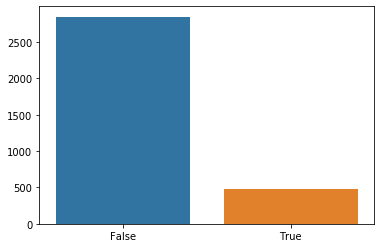

In [5]:
print("\n", df['churn'].value_counts())

print(f"\nchurn index : {df['churn'].value_counts().index}\nchurn values : {df['churn'].value_counts().values}")

sns.barplot(df['churn'].value_counts().index, df['churn'].value_counts().values)
plt.show()

## Checking the data is balanced or imbalanced

In [6]:
y = df["churn"].value_counts()
print(f"Churn Data :\n{y}\n")

# save all the rows where churn is True
y_True = df["churn"][df["churn"] == True]
print(y_True)

print ("\nChurn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))


Churn Data :
False    2850
True      483
Name: churn, dtype: int64

10      True
15      True
21      True
33      True
41      True
        ... 
3301    True
3304    True
3320    True
3322    True
3323    True
Name: churn, Length: 483, dtype: bool

Churn Percentage = 14.491449144914492


In [7]:
df.groupby(["state", "churn"]).size().unstack()

churn,False,True
state,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


# EDA

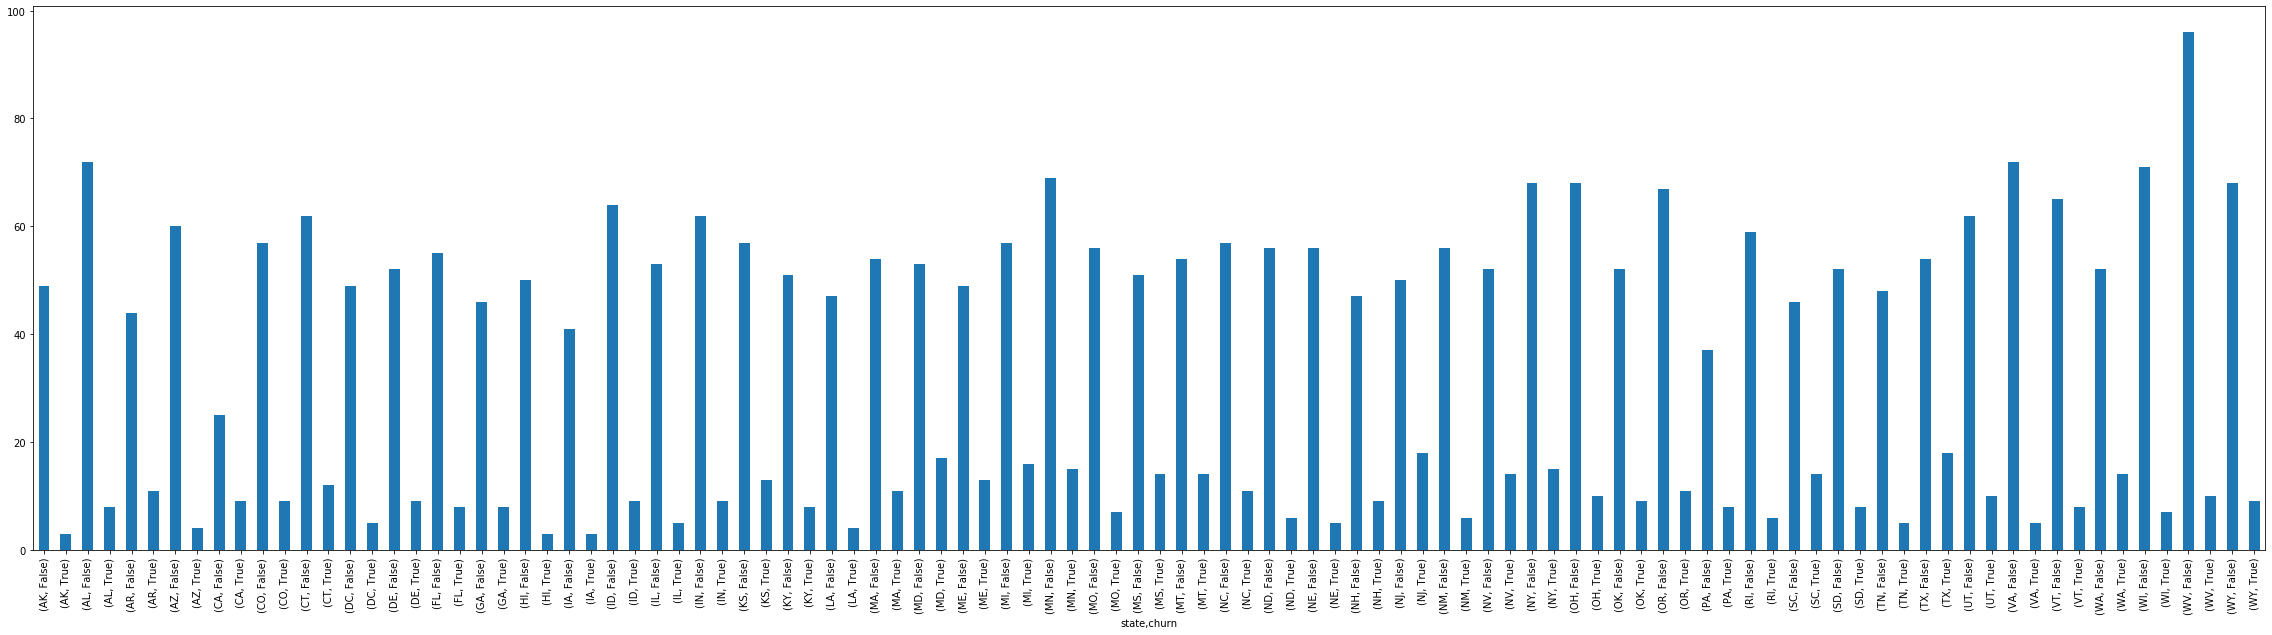

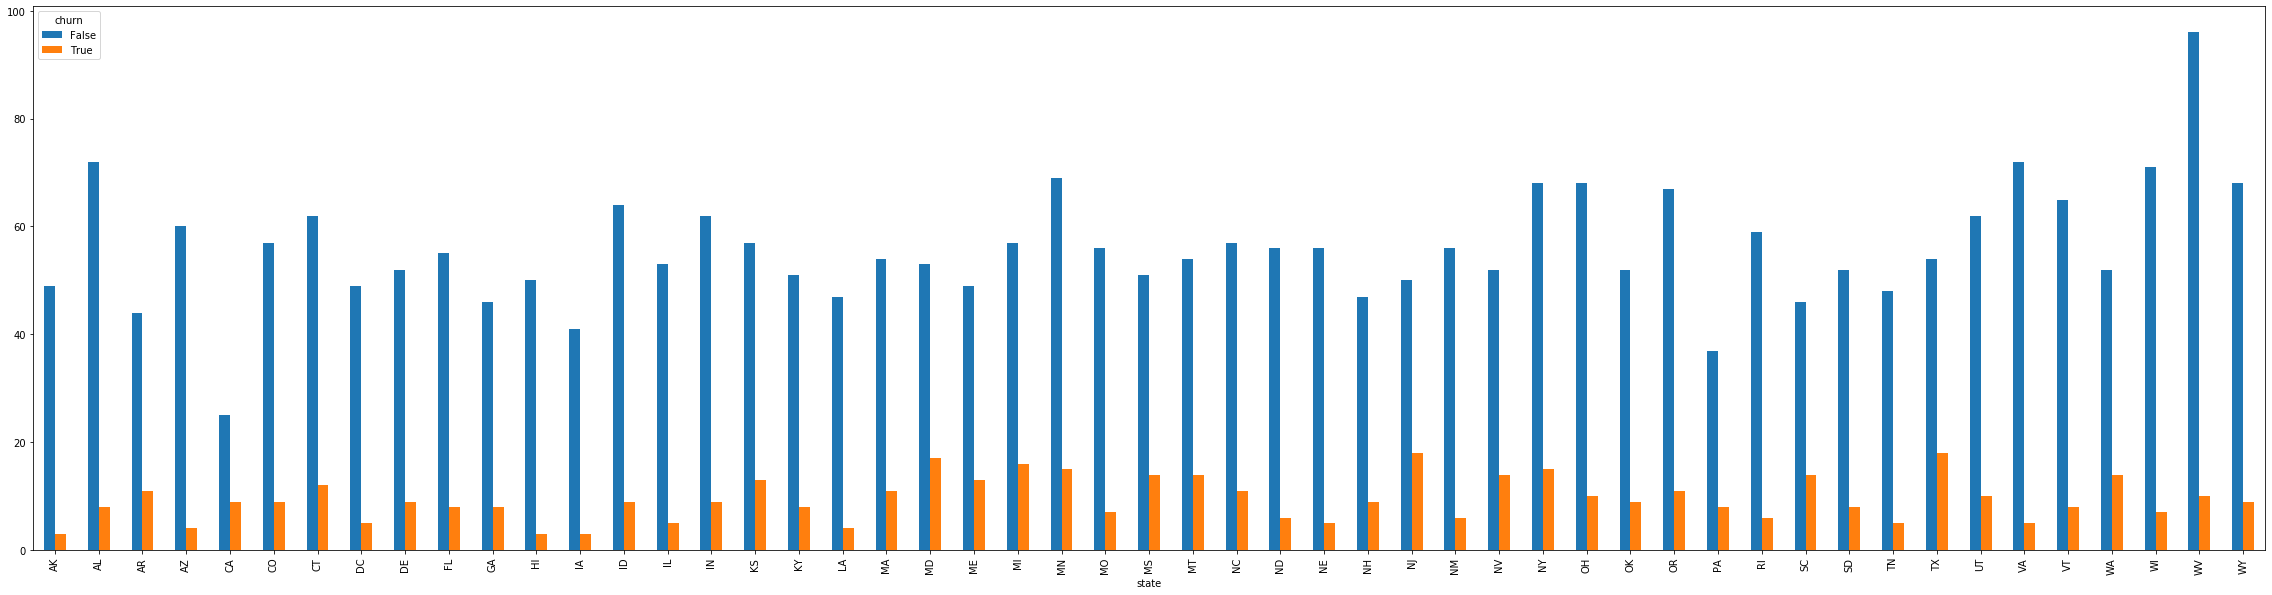

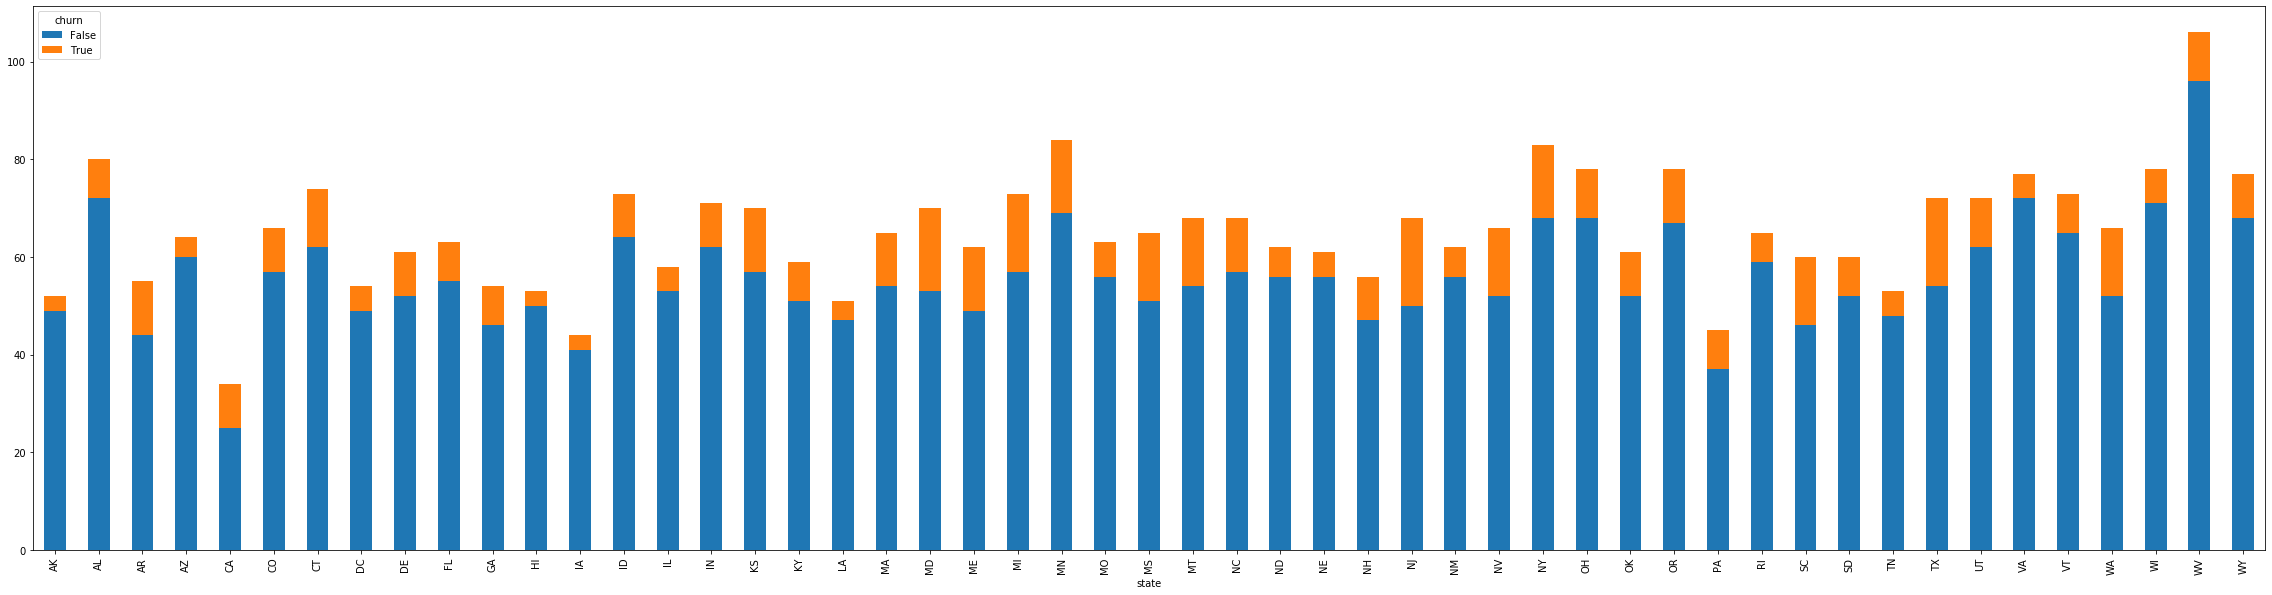

In [8]:
## Churn by State

df.groupby(["state", "churn"]).size().plot(kind='bar', stacked=False, figsize=(40, 10))
plt.show()

df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(40, 10))
plt.show()

df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(40, 10))
plt.show()

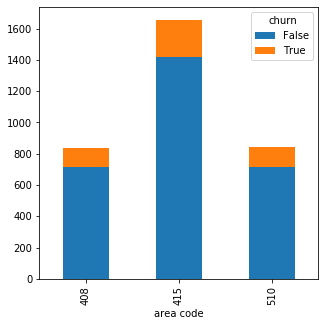

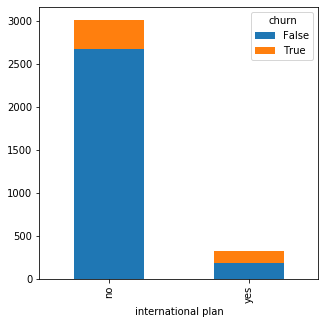

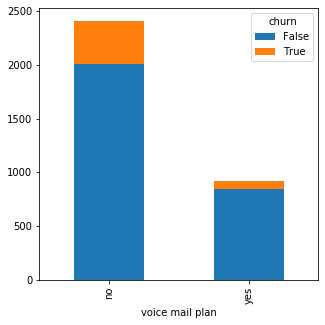

In [9]:
### Churn by Area Code

df.groupby(["area code", "churn"]).size().unstack().plot(kind="bar", stacked=True, figsize=(5,5))
plt.show()

## Churn by international plan

df.groupby(["international plan", "churn"]).size().unstack().plot(kind="bar", stacked=True, figsize=(5,5))
plt.show()

## Churn by international plan

df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind="bar", stacked=True, figsize=(5,5))
plt.show()

## Label Encoding - Categorical Columns

In [10]:
# discrete value encoder
label_encoder = preprocessing.LabelEncoder()
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [11]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [12]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.dtypes

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [14]:
df['churn'], df['churn'].shape

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 3328    False
 3329    False
 3330    False
 3331    False
 3332    False
 Name: churn, Length: 3333, dtype: bool, (3333,))

## Strip of Response Value

In [15]:
y = df['churn'].to_numpy().astype(np.int)
y, y.size

(array([0, 0, 0, ..., 0, 0, 0]), 3333)

## Strip of Redundant Cols

In [16]:
df.drop(["phone number", "churn"], axis = 1, inplace = True)

In [17]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


## Build Feature Matrix

In [18]:
X = df.to_numpy().astype(np.float)
X.shape, X

((3333, 19), array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
        [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
        [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
        ...,
        [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
        [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
        [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]]))

## Standardize Feature Matrix Values

In [19]:
scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

## Split : Stratified Cross Validation 
### ~ Because the response values are not balanced**

### sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None
- The Stratified K-Folds is a cross-validator.
- Provides train/test indices to split data in train/test sets.
- This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
- It generates test sets such that all contain the **same distribution of classes**, or as close as possible.


In [20]:
def stratified_cross_validate_with_classifier(X, y, clf_class, shuffle=True, n_folds = 10, **kwargs):

    # copy labels to predict
    y_pred = y.copy()

    for train_index, test_index in StratifiedKFold(n_folds).split(X, y):
        
#         print(f"\nTotal train_index : {len(train_index)}")
#         print(f"\nTotal test_index : {len(test_index)}")
        
        X_train, X_test = X[train_index], X[test_index]
        
        y_train, y_test = y[train_index], y[test_index]
        
        clf = clf_class(**kwargs)
        
        clf.fit(X_train , y_train)
        
        y_pred[test_index] = clf.predict(X_test)
        
    return y_pred


In [21]:
gradient_boosting_classifier = stratified_cross_validate_with_classifier(X, y, ensemble.GradientBoostingClassifier)

support_vector_machine = stratified_cross_validate_with_classifier(X, y, svm.SVC)

random_forest_classifier = stratified_cross_validate_with_classifier(X, y, ensemble.RandomForestClassifier)

k_nearest_neighbor_classifier = stratified_cross_validate_with_classifier(X, y, neighbors.KNeighborsClassifier)

logistic_regression = stratified_cross_validate_with_classifier(X, y, linear_model.LogisticRegression)

## Build Models : Train and Predict

**sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)**

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [22]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, gradient_boosting_classifier)))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, support_vector_machine)))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, random_forest_classifier)))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, k_nearest_neighbor_classifier)))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, logistic_regression)))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.96
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


## Confusion Matrix 

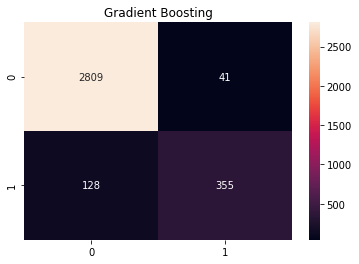

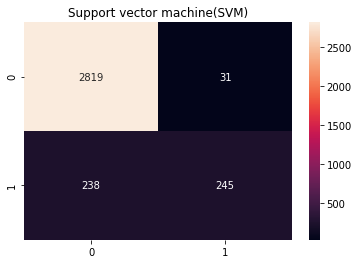

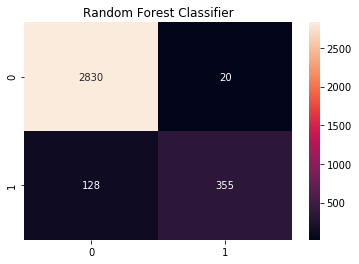

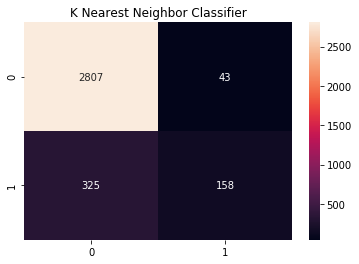

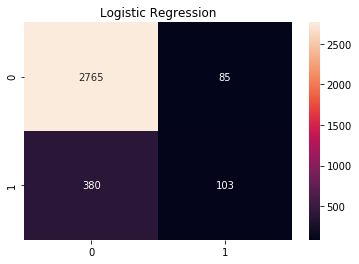

In [23]:
gbc_conf_mat = metrics.confusion_matrix(y, gradient_boosting_classifier)

sns.heatmap(gbc_conf_mat, annot=True, fmt='')
title='Gradient Boosting'
plt.title(title)
plt.show()


svm_conf_mat = metrics.confusion_matrix(y, support_vector_machine)

sns.heatmap(svm_conf_mat, annot=True, fmt='')
title='Support vector machine(SVM)'
plt.title(title)
plt.show()


rfc_conf_mat = metrics.confusion_matrix(y, random_forest_classifier)

sns.heatmap(rfc_conf_mat, annot=True, fmt='')
title='Random Forest Classifier'
plt.title(title)
plt.show()


knc_conf_mat = metrics.confusion_matrix(y, k_nearest_neighbor_classifier)

sns.heatmap(knc_conf_mat, annot=True, fmt='')
title='K Nearest Neighbor Classifier'
plt.title(title)
plt.show()


lr_conf_mat = metrics.confusion_matrix(y, logistic_regression)

sns.heatmap(lr_conf_mat, annot=True, fmt='')
title='Logistic Regression'
plt.title(title)
plt.show()

## Classification Report

In [24]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, gradient_boosting_classifier)))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.90      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333




## Final Model Selection

In [25]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[0.00275101 0.00286275 0.00075197 0.09486837 0.03717257 0.04636559
 0.1484541  0.00385574 0.141929   0.07994088 0.00081427 0.06365339
 0.01137308 0.0011229  0.00671289 0.04430803 0.11096558 0.0386379
 0.16345999]


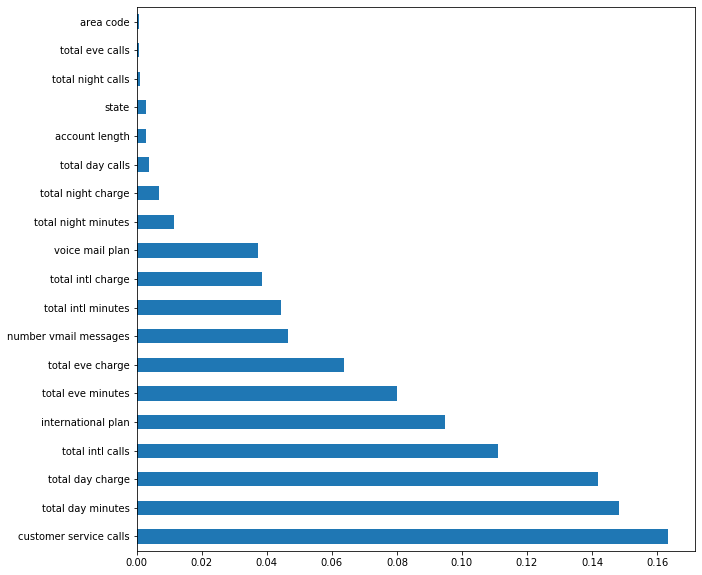

In [26]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_

print (gbc.feature_importances_)

feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)

feat_importances.plot(kind='barh' , figsize=(10,10)) 
plt.show()